<a href="https://colab.research.google.com/github/vachkim/PROJECT/blob/master/Pro_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 모듈 다운
- 데이터 분석과 시각화에 필수적인 모듈을 import해놓기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. 데이터 수집
- google drive와 연결해 자료를 수집하기

In [ ]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'Titanic'

/content/drive/My Drive/Colab Notebooks/Titanic


In [ ]:
%ls

gender_submission.csv  test.csv  train.csv


In [ ]:
gender_submission = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

### 3. 데이터 확인
- shape, info, head 등의 명령어를 통해 데이터의 전반적인 구조를 확인한다

In [ ]:
gender_submission.shape #gender_submission은 418개의 행과 2개의 열로 이루어진 데이터셋임을 알 수 있다

(418, 2)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.shape

(891, 12)

In [ ]:
gender_submission.info() #gender_submission에 passenger id와 survived에 대한 정보가 담겨 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
test.info() 
#train과 달리 test에는 survived에 대한 정보가 없음을 확인하자
#test에 담겨 있는 id의 생존여부는 gender_submission에 포함되어 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
gender_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [ ]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 4. 결측치 확인 및 시각화
- 본 장에서는 정보가 모두 포함되어 있는 train 정보를 활용할 것이다
- 자료를 본격적으로 가공하기 전에 결측치를 확인하고 대강의 정보를 시각화로 확인해보자
- 결측치는 isnull()을 통해 확인이 가능하고 전체 결측치 수를 하는 것은 sum()을 통해 가능하다

In [ ]:
train.isnull().sum()
# Age에는 177개, Cabin에는 687개의 결측치가 있음을 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 자료의 이해를 도모하기 위해 성별에 따른 생존자수 그래프를 그려 확인한다
- 아래와 같이 코딩할 수 있다

In [ ]:
#train이라는 데이터셋에서 survived=1인 자료만을 추출해 sex를 기준으로 분류하는 식이다
survived=train[train['Survived']==1]['Sex'].value_counts()
dead=train[train['Survived']==0]['Sex'].value_counts()
print(survived)
print(dead)

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


- 위를 하나의 데이터프레임으로 만든다

In [ ]:
Df = pd.DataFrame([survived,dead])
Df

,female,male
Sex,233,109
Sex,81,468


- 위의 도표에서 올바르지 못한 인덱스명을 확인할 수 있다
- index기능을 활용해 수정해보도록 하겠다

In [ ]:
Df.index=['Survived','Dead']
Df

,female,male
Survived,233,109
Dead,81,468


- 데이터프레임에는 자체적으로 그래프를 그리는 기능이 있다
- plot()을 사용해서 그래프를 그려보자

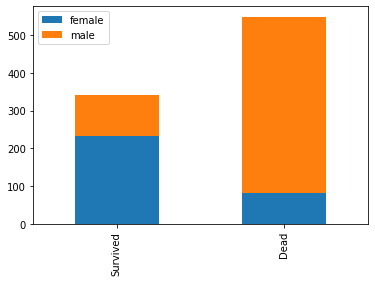

In [ ]:
Df.plot(kind='bar',stacked=True)

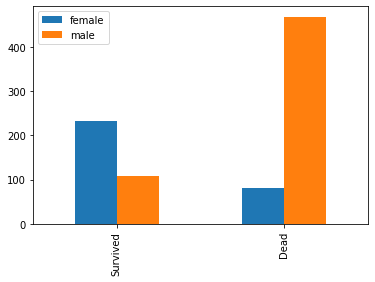

In [ ]:
Df.plot(kind='bar',stacked=False)

- 정리한 seaborn으로도 시각화를 할 수 있을 것 같다

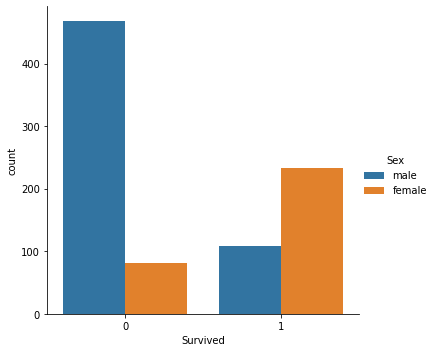

In [ ]:
sns.catplot(x='Survived',kind='count',hue='Sex',data=train);
#seaborn에서 stacked bar plot을 만드는 건 겁나 어렵네

### 5. 데이터 처리

#### 1) 정규화를 이용한 이름 처리
- 이름에서 정규화를 이용, 호칭만을 추출해낼 수 있다
- 호칭에는 성별 뿐만 아니라 결혼 여부 등에 대한 정보가 있으니 추출해 활용해보자

In [ ]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.') #앞에 공백이 있고 뒤에 점이 있는 값을 추출
train.head(3) # Title이라는 새로운 칼럼을 만들어 저장한다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Don           1
Jonkheer      1
Ms            1
Mme           1
Lady          1
Countess      1
Capt          1
Name: Title, dtype: int64

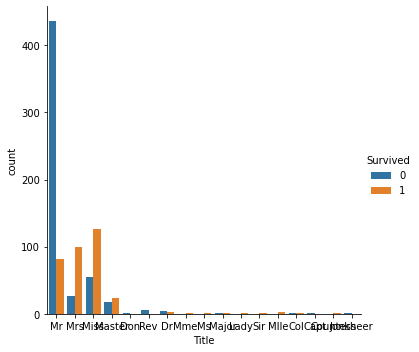

In [ ]:
sns.catplot(x='Title',kind='count',hue='Survived',data=train);

#### 2) Categorical 변수의 인코딩
- 추출된 호칭 정보를 숫자값으로 인코딩한다
- 값을 변경하기 전에는 항상 복사본을 만들어두자

In [ ]:
train_copy = train.copy()

In [ ]:
train = train_copy

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [ ]:
#칼럼을 기준으로 조건을 부여하면 모든 칼럼값이 변경되기 때문에
#조건을 주기전에 데이터를 리스트로 변경하고 if,for문을 사용하도록 하자

title = list(train['Title'])
new_title = []

for item in title:
  if item == 'Mr':
    new_title.append(0)
  elif item == 'Miss':
    new_title.append(1)
  elif item == 'Mrs':
    new_title.append(2)
  else:
    new_title.append(3)

train['Title'] = new_title

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


- 이외에도 Mapping Table을 이용하는 방법이 있다
 


In [ ]:
#map은 전체 값에 주어진 fucntion을 수행하는 함수임을 기억하자
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mile":3,"Col":3,"Sir":3,
                 "Don":3,"Mme":3,"Jonkheer":3,"Cpat":3,"Lady":3,"Countess":3,"Ms":3}
train['Title2']=train['Title'].map(title_mapping)

- 같은 방법으로 sex를 숫자값으로 인코딩해보자

In [ ]:
sex = list(train['Sex'])
new_sex = []

for item in sex:
  if item == 'male':
    new_sex.append(0)
  if item == 'female':
    new_sex.append(1)

train['Sex']=new_sex

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


#### 3) 결측치 처리
 - 결측치가 있는 Age와 Cabin 칼럼을 매꿔보자

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

##### 1) Age에 대한 결측치
- 앞서 정리한 호칭별 중앙값을 입력하여 결측치를 채운다
- 먼저 호칭별 중앙값을 찾아보자

In [ ]:
train.groupby('Title')['Age'].agg('median')
#agg()안에 들어간 값을 기준으로 데이터를 집합

Title
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64

In [ ]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
#transform하면 값을 집어넣을 수 있다
#inplace=True를 하는 이유는 값을 바로 수정하기 위해서
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

- 결측치 처리한 나이를 grouping하기
- grouping을 위해서는 시각화를 통해 grouping의 기준을 찾아야한다

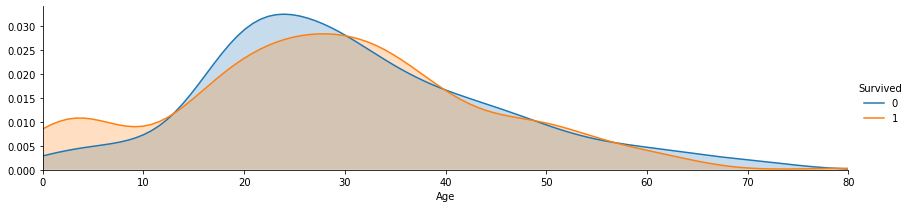

In [ ]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend();
#특정 부분만 확대하고 싶으면 plt.xlin(a,b)

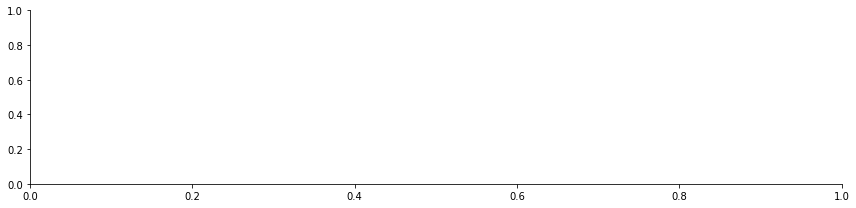

In [ ]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4);

- 보면 facetgrid만 단독으로 수행하면 도표가 그려지지 않는 것을 확인할 수 있다
- facetgrid로 우리가 한 일은 train에서 survived를 바탕으로 자료를 나눈 것 뿐이네

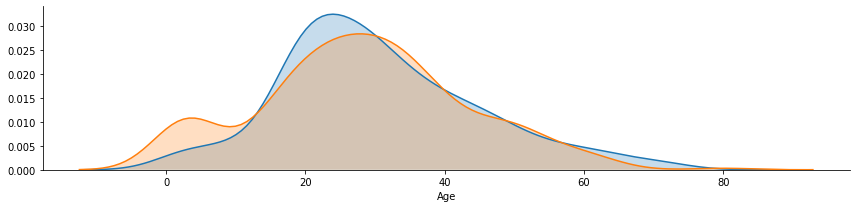

In [ ]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True);

- 이렇게 facetgird에 mapping을 해주면 Survived로 분류한 Facetgrid를 kdeplot으로 나타내주게 되지
- kdeplot = distribution을 보여주는 거니깐 위는 Age를 기준으로 distribution으로 보여주네

- 이거 순수하게 kdeplot만 사용할 수 없나
- 그래프 크기 조절하면 될 거 같은데 방법을 모르겠다

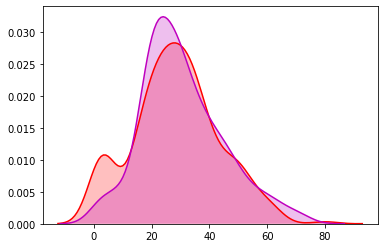

In [ ]:
x= train[train['Survived']==1]['Age'].values
y= train[train['Survived']==0]['Age'].values
ax = sns.kdeplot(x, color = 'r', shade=True);
ax = sns.kdeplot(y, color='m', shade=True);

- 15,26,36,62세를 기준으로 Age를 grouping해보자

In [ ]:
train_copy = train.copy()

In [ ]:
train = train_copy

In [ ]:
age = list(train['Age'])
new_age = []

for item in age:
  if item <= 16:
    new_age.append(0)
  elif (item > 16 and item <= 26):
    new_age.append(1)
  elif (item > 26 and item <= 36):
    new_age.append(2)
  elif (item > 36 and item <=62):
    new_age.append(3)
  else:
    new_age.append(4)

train['Age'] = new_age
   


In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()
print(survived)
print(dead)

0    342
Name: Age, dtype: int64
0    549
Name: Age, dtype: int64


In [ ]:
Df=pd.DataFrame([survived,dead],index=['Survived','Dead'])
Df

,0
Survived,342
Dead,549


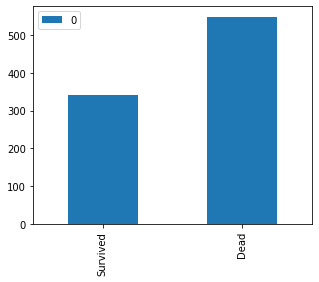

In [ ]:
Df.plot(kind='bar',stacked=True, figsize=(5,4));

##### 2) Embarked에 대한 결측치
- Age와 마찬가지로 Embarked에 대한 결측치를 채우기 위해 시각화를 진행

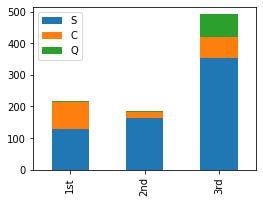

In [ ]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st','2nd','3rd']
df.plot(kind='bar', stacked=True, figsize=(4,3));

- Embarked에 있어서 3개 항목 모두 S값이 많으므로 결측치를 최빈값인 S로 채움

In [ ]:
train['Embarked']=train['Embarked'].fillna('S')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Age와 마찬가지로 Embarked에 대한 grouping을 진행

In [ ]:
emb = list(train['Embarked'])
new_emb = []

for item in emb:
  if item == 'S':
    new_emb.append(0)
  elif item == 'C':
    new_emb.append(1)
  else:
    new_emb.append(2)

train['Embarked'] = new_emb

In [ ]:
survived = train[train['Survived']==1]['Embarked'].value_counts()
dead = train[train['Survived']==0]['Embarked'].value_counts()
print(survived)
print(dead)

0    219
1     93
2     30
Name: Embarked, dtype: int64
0    427
1     75
2     47
Name: Embarked, dtype: int64


In [ ]:
Df = pd.DataFrame([survived,dead], index=['Survived','Dead'])
Df

,0,1,2
Survived,219,93,30
Dead,427,75,47


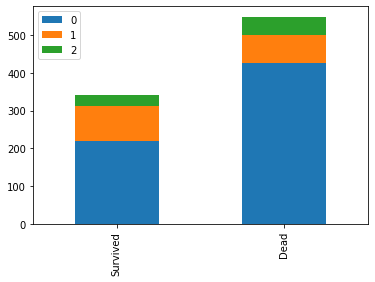

In [ ]:
Df.plot(kind='bar',stacked=True);

##### 3) Cabin에 대한 결측치 처리
- Cabin의 앞자리 A-G까지만을 가지고 와서 데이터 분석

In [ ]:
train['Cabin']=train['Cabin'].str[:1]

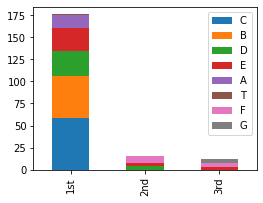

In [ ]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st','2nd','3rd']
df.plot(kind='bar', stacked=True, figsize=(4,3));

- 각 값에 수치를 부여하고 Pclass별 중간값으로 결측치 채움

In [ ]:
cabin_mapping = {"A":0.0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
train['Cabin']=train['Cabin'].map(cabin_mapping)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,1,0,PC 17599,71.2833,0.8,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0,STON/O2. 3101282,7.9250,NaN,0


In [ ]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [ ]:
new_train = pd.DataFrame({'Survived':train['Survived'],'Pclass':train['Pclass'],'Sex':train['Sex'],
                       'Age':train['Age'],'Embarked':train['Embarked'],'Fare':train['Fare'],'Cabin':train['Cabin'],})

In [ ]:
new_train.head(3)

,Survived,Pclass,Sex,Age,Embarked,Fare,Cabin
0,0,3,male,0,0,7.2500,2.0
1,1,1,female,0,1,71.2833,0.8
2,1,3,female,0,0,7.9250,2.0
